<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/2.%20Learning_Rate%20and%20Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part one

Aim: To tune the learning rate and momentum of SGD optimizer as a baseline on CIFAR10 dataset with CNN implementation in earlier exercise, then test the different sets of parameters and plot the best found. Then observe/deduce the influence of tuning different sets of parameters.

170498071/170498071 [==============================] - 13s 0us/step
Learning Rate: 0.001, Momentum: 0.0, Validation Accuracy: 0.30000001192092896
Learning Rate: 0.001, Momentum: 0.2, Validation Accuracy: 0.30970001220703125
Learning Rate: 0.001, Momentum: 0.5, Validation Accuracy: 0.39480000734329224
Learning Rate: 0.001, Momentum: 0.9, Validation Accuracy: 0.5803999900817871
Learning Rate: 0.01, Momentum: 0.0, Validation Accuracy: 0.5329999923706055
Learning Rate: 0.01, Momentum: 0.2, Validation Accuracy: 0.5759999752044678
Learning Rate: 0.01, Momentum: 0.5, Validation Accuracy: 0.5964000225067139
Learning Rate: 0.01, Momentum: 0.9, Validation Accuracy: 0.6863999962806702
Learning Rate: 0.1, Momentum: 0.0, Validation Accuracy: 0.6625999808311462
Learning Rate: 0.1, Momentum: 0.2, Validation Accuracy: 0.6628000140190125
Learning Rate: 0.1, Momentum: 0.5, Validation Accuracy: 0.6664000153541565
Learning Rate: 0.1, Momentum: 0.9, Validation Accuracy: 0.10000000149011612
Best Learning Ra

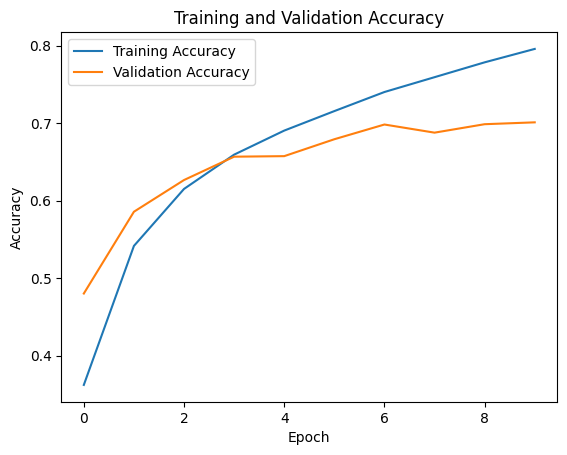

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the CNN architecture
def build_cnn(learning_rate, momentum):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define sets of parameters to test
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.2, 0.5, 0.9]

best_accuracy = 0.0
best_lr = None
best_momentum = None

# Test different sets of parameters
for lr in learning_rates:
    for momentum in momentums:
        model = build_cnn(learning_rate=lr, momentum=momentum)
        history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)
        accuracy = history.history['val_accuracy'][-1]

        print(f"Learning Rate: {lr}, Momentum: {momentum}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_momentum = momentum

# Print the best parameters
print(f"Best Learning Rate: {best_lr}, Best Momentum: {best_momentum}, Best Validation Accuracy: {best_accuracy}")

# Plot the training and validation accuracy with the best parameters
model = build_cnn(learning_rate=best_lr, momentum=best_momentum)
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


After tuning the learning rate and momentum of SGD optimizer as a baseline on CIFAR10 dataset with CNN implementation, it can be observed that tuning the parameters can allow you to find the best combination of parameters to optimize the training results.

Part Two

Aim: Apply RMSProp, AdaGrad and Adam optimizer to compare the differences with SGD optimizer in tuning the same parameters they share.then state observed discovery as done in earlier tasks.

SGD - Validation Accuracy: 0.5771999955177307
RMSProp - Validation Accuracy: 0.6506999731063843
AdaGrad - Validation Accuracy: 0.3813999891281128
Adam - Validation Accuracy: 0.7042999863624573


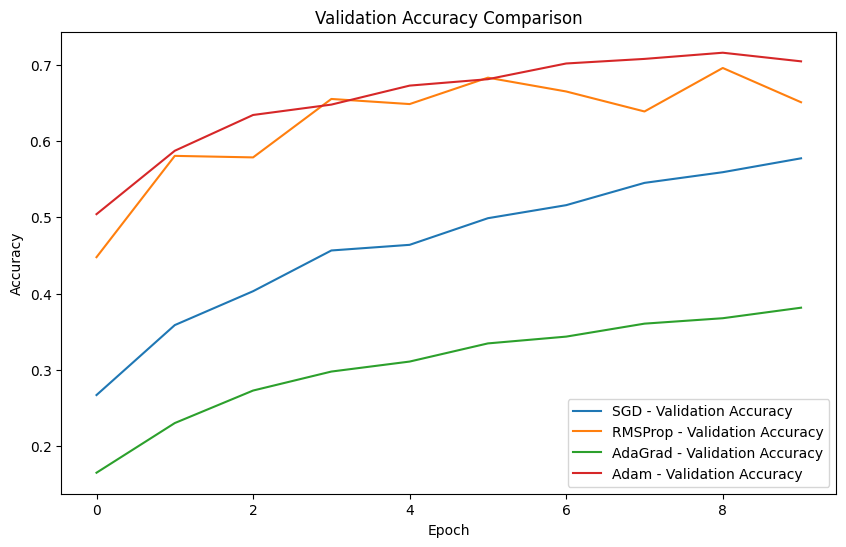

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the CNN architecture
def build_cnn(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define sets of parameters to test
learning_rate = 0.001
momentum = 0.9

# Test different optimizers
optimizers = {
    'SGD': SGD(learning_rate=learning_rate, momentum=momentum),
    'RMSProp': RMSprop(learning_rate=learning_rate),
    'AdaGrad': Adagrad(learning_rate=learning_rate),
    'Adam': Adam(learning_rate=learning_rate)
}

# Train models with different optimizers
histories = {}

for optimizer_name, optimizer in optimizers.items():
    model = build_cnn(optimizer)
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)
    histories[optimizer_name] = history

    # Print and plot results
    accuracy = history.history['val_accuracy'][-1]
    print(f"{optimizer_name} - Validation Accuracy: {accuracy}")

# Plot the training and validation accuracy for each optimizer
plt.figure(figsize=(10, 6))

for optimizer_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} - Validation Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In comparing the differences, it can be observed that Adam performed best with the highest validation accuracy followed by RMSProp. SGD and AdaGrad had lower validation accuracies compared to the first two, after tuning the parameters.

---

